### This file decribes how to get scrape a working csv-file from wikinews.org

# IT NEED A LOT OF STUFF NOT IMPLEMENTED COMPLITELY

Table taken from: https://github.com/several27/FakeNewsCorpus - go there for better table formating

| Type | Tag | Count (so far) | Description|
| ------------- |-------------|:-------------:|:-------------:|
| **Fake News** | fake | 928,083 | Sources that entirely fabricate information, disseminate deceptive content, or grossly distort actual news reports |
| **Satire** | satire | 146,080 | Sources that use humor, irony, exaggeration, ridicule, and false information to comment on current events. |
| **Extreme Bias** | bias | 1,300,444 | Sources that come from a particular point of view and may rely on propaganda, decontextualized information, and opinions distorted as facts. |
| **Conspiracy Theory** | conspiracy | 905,981 | Sources that are well-known promoters of kooky conspiracy theories. |
| **State News** | state | 0 | Sources in repressive states operating under government sanction. |
| **Junk Science** | junksci | 144,939 | Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims. |
| **Hate News** | hate | 117,374 | Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination. |
| **Clickbait** | clickbait | 292,201 | Sources that provide generally credible content, but use exaggerated, misleading, or questionable headlines, social media descriptions, and/or images. |
| **Proceed With Caution** | unreliable | 319,830 | Sources that may be reliable but whose contents require further verification. |
| **Political** | political | 2,435,471 | Sources that provide generally verifiable information in support of certain points of view or political orientations. |
| **Credible** | reliable | 1,920,139 | Sources that circulate news and information in a manner consistent with traditional and ethical practices in journalism (Remember: even credible sources sometimes rely on clickbait-style headlines or occasionally make mistakes. No news organization is perfect, which is why a healthy news diet consists of multiple sources of information). |

In [1]:
# Follow the link below:
# https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing
# https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/



import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string

### Import and get basic information about the data

First we import the data and get an idea about how it it structured and so on such that we can better understand what has to be done.

- Below we import and create a type_id colum (might remove later)


In [2]:
### Import data and setup dataframe ###

# usage: specify file location
filepath = '../Data_git_ignore/1mio-raw.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
entire_df = pd.read_csv(filepath, index_col = [0])

# ### Select columns to use ###
# entire_df = entire_df[['id', 'domian', 'type_id', 'content', 'title', 'meta_description', 'scraped_at', 'updated_at', 'inserted_at']]

### Below are overall integrity cleaning ###

# content has to be unique
entire_df = entire_df.drop_duplicates(['content'])

# id has to be unique
entire_df = entire_df.drop_duplicates(['id'])

# Create type_id column
entire_df['type_id'] = entire_df.groupby(['type']).ngroup()

# Show info about enire dataset
entire_df

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,type_id
0,2,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,NaN,NaN,NaN,8
1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN,4
2,7,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN,4
3,8,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,NaN,NaN,NaN,4
4,9,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,1170082,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1974ATO...,Raw content\n\nPAGE 01 NATO 05116 01 OF 02 201...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Cable: 1974ATO05116,NaN,NaN,[''],NaN,View Tags,NaN,NaN,11
9906,1170093,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1976ABU...,Raw content\n\nCONFIDENTIAL PAGE 01 ABU DH 000...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Cable: 1976ABUDH00021,NaN,NaN,[''],NaN,View Tags,NaN,NaN,11
9913,1170100,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1976ANK...,Raw content\n\nCONFIDENTIAL PAGE 01 ANKARA 019...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Cable: 1976ANKARA01989,NaN,NaN,[''],NaN,View Tags,NaN,NaN,11
9923,1170110,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1976ROM...,Raw content\n\nLIMITED OFFICIAL USE PAGE 01 RO...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Cable: 1976ROME16372,NaN,NaN,[''],NaN,View Tags,NaN,NaN,11


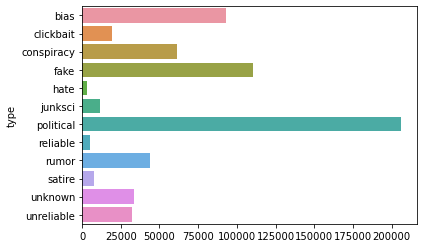

In [3]:
### Show info about "entire"-dataset ###

# Show rows for each type
types = entire_df.groupby('type').content.count()
sns.barplot(types.values, types.index)

In [4]:
### SELECT SIZE OF -> sub-dataset ###

# This can generate a dataset with random purmutation and a max size for each type(can be smaller if desired max is not possible)

# max size for type
max_size = 1000000
# Labels to include - ['fake', 'satire', 'bias', 'conspiracy', 'state', 'junksci', 'hate', 'clickbait', 'unreliable', 'political', 'reliable'] - all labels
use_types = ['fake', 'satire', 'bias', 'conspiracy', 'junksci', 'hate', 'clickbait', 'unreliable', 'political', 'reliable']
# Random seed
rnd = 1

# initialize dataframes
df = pd.DataFrame(columns = entire_df.columns)

# add type to test splits
for t in use_types:

    # type size
    type_size = entire_df['type'].loc[entire_df['type'] == t].value_counts().min()

    # set size of type slice
    if type_size < max_size:
        tmp = entire_df.loc[entire_df['type'] == t].sample(n = type_size, random_state=rnd)
    else:
        tmp = entire_df.loc[entire_df['type'] == t].sample(n = max_size, random_state=rnd)
    
    # add tmp to dataframes
    df = pd.concat([df, tmp])
    
    # print split shape
    print("=>", t, tmp.shape)

print("\n[Final sub-dataset]\nwhole ==>", df.shape)

=> fake (110614, 17)
=> satire (7513, 17)
=> bias (93205, 17)
=> conspiracy (61403, 17)
=> junksci (11468, 17)
=> hate (3112, 17)
=> clickbait (19334, 17)
=> unreliable (32537, 17)
=> political (206012, 17)
=> reliable (5222, 17)

[Final sub-dataset]
whole ==> (550420, 17)


,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,type_id
count,550420,550420,550420,550420,550420,550420,550420,550420,549957,330791,0,550420,166315,172097,0,0,550420
unique,550420,310,10,550420,550420,2,1,1,508911,46802,0,81224,155746,112222,0,0,10
missing,0,0,0,0,0,0,0,0,463,219629,550420,0,384105,378323,550420,550420,0


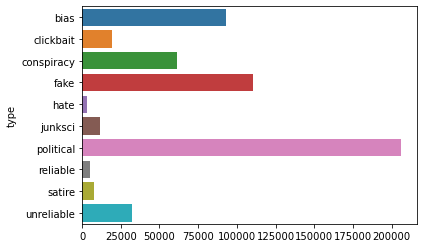

In [5]:
### Show info about sub-dataset ###

# Show rows for each type
types = df.groupby('type').content.count()
sns.barplot(types.values, types.index)

# Show "descibe" data
describe_df = df.describe(include=[np.object]).head(2)
nan_df = df.isna().sum()
describe_df.loc['missing'] = nan_df
describe_df

In [6]:
### REMOVE AND REPLACE -> NaN/Empty elmements ###

# Remove rows where columns are NaN
df.dropna(subset=['title'])

# Replace NaN-elements with 'NULL'
df = df.fillna('NULL')

# Replace "['']" - these are NaN 
regex = r"\[''\]"
df['meta_keywords'] = df['meta_keywords'].replace(to_replace=regex, value='NULL', regex=True)

# Replace '_' or '' (empty str) from "string-like" columns - these are NaN
regex = r"^$|^ +"
columns = ['domain', 'type', 'url', 'content', 'title', 'authors', 'keywords', 'meta_description', 'tags', 'summary', 'source']
df[columns] = df[columns].replace(to_replace=regex, value='NULL', regex=True)

### Dataset Preparation

Here we start the cleaning process. There are a lot of steps and the code can be a little complicated. Some steps have to be before others as they overrule the previous 

- how to implement is still up for debate as it can be smart to use small cells for each step or get all in one big cleaning step but display when they are done
- **READ** all excersice 1-7 on KU

### Common data cleaning steps
- make text all lower case
- remove puntuiation
- remove numerical values
- remove common non-sensial text(/n)
- tokanize text

### # steps that need to be included
- -NUM -DATE -EMAIL -URL
- replace nan with 'NULL'

### Text blob cleaning
The first cleaning-step is wokring on text blobs ie. all text at the same time

In [7]:
# # working with content as a series
series_content = df['content']

### Order matters - (not final order of pipeline)
### Overall preprocessing

# lower_cast - NEEDED? - DONE by many libs
%time print("\n (lower_cast)"); series_content = series_content.str.lower()

### replace [name] with tokens in text ###

# Email_replace
regexEmail = r"[a-zA-Z_-]+@[a-zA-Z_-]+(?:\.[a-zA-Z]{2,4}){1,3}"
%time print("\n (Email_replace)"); series_content = series_content.replace(to_replace=regexEmail, value=' EMAIL ', regex=True)

# replace URLs  with token
regexURL= r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*"
%time print("\n (URL_replace)"); series_content = series_content.replace(to_replace=regexURL, value=' URL ', regex=True)

# HTML_replace
regexHTML = r"<\s*a[^>]*>(.*?)<\s*/\s*a>"
%time print("\n (HTML_replace)"); series_content = series_content.replace(to_replace=regexHTML, value=' HTML ', regex=True)

# Date_replace - NOT DONE
# - name         (jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)
# - day in month ([12]\d|3[01]|0?[1-9]) - Day 0-31
# - year         ([12][0-9]{3})         - Years from 1000 to 2999
regexDate = r"(((19[7-9]\d|20\d{2})|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?)|(([12][0-9])|(3[01])|(0?[1-9])))[\/. \-,\n]){2,3}"
%time print("\n (Date_replace)"); series_content = series_content.replace(to_replace=regexDate, value=' DATE ', regex=True)

# Number_replace
regexNum = r"[0-9][0-9,\.]+" # nums with [0-9] and [,.]
%time print("\n (Number_replace)"); series_content = series_content.replace(to_replace=regexNum, value=' NUM ', regex=True)

### string removal functions ###

# Punctuation_remove
regexPunkt = r"[!“”\"#$%&()*+,\-–.…\/:;<=>?@[\\\]^_`{|}~'\’\']" # also removes: " ' " which means ie. it's -> its - remove \' from regwex if not needed
%time print("\n (Punctuation_remove)"); series_content = series_content.replace(to_replace=regexPunkt, value='', regex=True)

# whitespace_remove
regexWhiteSpace = r"\s+|\\n+"
%time print("\n (whitespace_remove)"); series_content = series_content.replace(to_replace=regexWhiteSpace, value=' ', regex=True)

# # Non_ASCII_remove - Maybe a step too much
# %time print("\n (Non_ASCII_remove)"); series_content = series_content.str.encode('ascii', 'ignore').str.decode('ascii')

# After all steps
print("\n (Done cleaning)")


 (lower_cast)
Wall time: 9.29 s

 (Email_replace)
Wall time: 54.1 s

 (URL_replace)
Wall time: 4min 6s

 (HTML_replace)
Wall time: 2 s

 (Date_replace)
Wall time: 11min 23s

 (Number_replace)
Wall time: 23.8 s

 (Punctuation_remove)
Wall time: 37 s

 (whitespace_remove)
Wall time: 2min 14s

 (Done cleaning)


In [8]:
### DEBUG content regex ###

# r = 4
# m = 4
# mutl_sample = df['content'].sample(5, random_state=r)
# before = mutl_sample
# print(mutl_sample)
# print(repr(mutl_sample.iloc[m]))

# ### DEBUG SETUP - COMPARE CLEAN VS NON_CLEAN ###
# series_content = mutl_sample
# ### DEBUG SETUP - COMPARE CLEAN VS NON_CLEAN ###

# ### DEBUG PRINT - COMPARE CLEAN VS NON_CLEAN ###
# print("[before]\n", repr(before.iloc[m]), "\n\n[After]\n", repr(series_content.iloc[m]) )
# ### DEBUG PRINT - COMPARE CLEAN VS NON_CLEAN ###


# for elm in range(len(mutl_sample)):
#     print("\n\n[before]\n", repr(before.iloc[m]), "\n[After]\n", repr(series_content.iloc[m]) )

In [9]:
# Lexemize content

# # imports used
# import swifter
# import spacy
# nlp = spacy.load('en_core_web_lg')
# # nlp = spacy.load('xx_ent_wiki_sm')

# # Lemma function
# def lemmatizer(text):        
#     sent = []
#     doc = nlp(text)
#     for word in doc:
#         sent.append(word.lemma_)
#     # return string_list
#     return "{" + str(sent)[1:-1] + "}"

# # Assingn Series for return
# content_tokenize_series = series_content.swifter.apply(lambda x: lemmatizer(x), axis=1)

# Faster but not as precise
content_tokenize_series = series_content.str.split()
regexStrList = r"\["
content_tokenize_series = content_tokenize_series.replace(to_replace=regexStrList, value='{', regex=True)
regexStrList = r"\]"
content_tokenize_series = content_tokenize_series.replace(to_replace=regexStrList, value='}', regex=True)

## Cleaning for other colums

In [10]:
# cleaning for other columns

# to-do add case for words line Niel's thois is pt transalted into Niels

# meta keywords has to be array_like_list - {elm1, elm2...}
regexStrList = r"\["
df['meta_keywords'] = df['meta_keywords'].replace(to_replace=regexStrList, value='{', regex=True)
regexStrList = r"\]"
df['meta_keywords'] = df['meta_keywords'].replace(to_replace=regexStrList, value='}', regex=True)

## Insert into dataframe and write to csv

In [11]:
# Insert series with changes into dataframe write csv-file

df['content_tokenize'] = content_tokenize_series


df['content'] = series_content

# write csv
df.to_csv('../Data_git_ignore/clean_corpus_max.csv', index=True, header=True)

# clean wiki

In [12]:
# importing and creating df (has to have type_id)

# usage: specify file location, sample size and seed(used by random) 
filepath = '../Data_sample/wiki_news_raw_backup.csv' # 250 rows of FakeNewsCorpus
s = 50                                             # desired sample size
seed = 1                                           # seed used by Pseudorandom number generator

df = pd.read_csv(filepath, index_col = [0])
df["content"] = df["content"].astype(str)

df.shape

(3680, 7)

In [13]:
# # working with content as a series
series_content = df['content']

### Order matters - (not final order of pipeline)
### Overall preprocessing

# lower_cast - NEEDED? - DONE by many libs
%time print("\n (lower_cast)"); series_content = series_content.str.lower()

### replace [name] with tokens in text ###

# Email_replace
regexEmail = r"[a-zA-Z_-]+@[a-zA-Z_-]+(?:\.[a-zA-Z]{2,4}){1,3}"
%time print("\n (Email_replace)"); series_content = series_content.replace(to_replace=regexEmail, value=' EMAIL ', regex=True)

# replace URLs  with token
regexURL= r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*"
%time print("\n (URL_replace)"); series_content = series_content.replace(to_replace=regexURL, value=' URL ', regex=True)

# HTML_replace
regexHTML = r"<\s*a[^>]*>(.*?)<\s*/\s*a>"
%time print("\n (HTML_replace)"); series_content = series_content.replace(to_replace=regexHTML, value=' HTML ', regex=True)

# Date_replace - NOT DONE
# - name         (jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)
# - day in month ([12]\d|3[01]|0?[1-9]) - Day 0-31
# - year         ([12][0-9]{3})         - Years from 1000 to 2999
regexDate = r"(((19[7-9]\d|20\d{2})|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?)|(([12][0-9])|(3[01])|(0?[1-9])))[\/. \-,\n]){2,3}"
%time print("\n (Date_replace)"); series_content = series_content.replace(to_replace=regexDate, value=' DATE ', regex=True)

# Number_replace
regexNum = r"[0-9][0-9,\.]+" # nums with [0-9] and [,.]
%time print("\n (Number_replace)"); series_content = series_content.replace(to_replace=regexNum, value=' NUM ', regex=True)

### string removal functions ###

# Punctuation_remove
regexPunkt = r"[!“”\"#$%&()*+,\-–.…\/:;<=>?@[\\\]^_`{|}~'\’\']" # also removes: " ' " which means ie. it's -> its - remove \' from regwex if not needed
%time print("\n (Punctuation_remove)"); series_content = series_content.replace(to_replace=regexPunkt, value='', regex=True)

# whitespace_remove
regexWhiteSpace = r"\s+|\\n+"
%time print("\n (whitespace_remove)"); series_content = series_content.replace(to_replace=regexWhiteSpace, value=' ', regex=True)

# start_whitespace_remove
regexStartWhite = r"^ "
%time print("\n (whitespace_remove)"); series_content = series_content.replace(to_replace=regexStartWhite, value='', regex=True)

# # Non_ASCII_remove - Maybe a step too much
# %time print("\n (Non_ASCII_remove)"); series_content = series_content.str.encode('ascii', 'ignore').str.decode('ascii')

# After all steps
print("\n (Done cleaning)")


 (lower_cast)
Wall time: 1.23 s

 (Email_replace)
Wall time: 200 ms

 (URL_replace)
Wall time: 1.14 s

 (HTML_replace)
Wall time: 11 ms

 (Date_replace)
Wall time: 2.88 s

 (Number_replace)
Wall time: 169 ms

 (Punctuation_remove)
Wall time: 140 ms

 (whitespace_remove)
Wall time: 557 ms

 (whitespace_remove)
Wall time: 90.4 ms

 (Done cleaning)


## Cleaning for other colums

In [14]:
# Lexemize content

# # imports used
# import swifter
# import spacy
# nlp = spacy.load('en_core_web_lg')
# # nlp = spacy.load('xx_ent_wiki_sm')

# # Lemma function
# def lemmatizer(text):        
#     sent = []
#     doc = nlp(text)
#     for word in doc:
#         sent.append(word.lemma_)
#     # return string_list
#     return "{" + str(sent)[1:-1] + "}"

# # Assingn Series for return
# content_tokenize_series = series_content.swifter.apply(lambda x: lemmatizer(x), axis=1)

# # Faster but not as precise
# content_tokenize_series = series_content.str.split()
# regexStrList = r"\["
# content_tokenize_series = content_tokenize_series.replace(to_replace=regexStrList, value='{', regex=True)
# regexStrList = r"\]"
# content_tokenize_series = content_tokenize_series.replace(to_replace=regexStrList, value='}', regex=True)

## Cleaning for other columns

In [15]:
# to-do add case for words line Niel's thois is pt transalted into Niels

# Data formating - use fist date
regexStrList = r".*?(.+? [0-9]{1,2}, [0-9]{4}).*"
df['publish_date'] = df['publish_date'].replace(to_replace=regexStrList, value=r'\1', regex=True)

In [16]:
# df['content'] = df['content'].str.split(" ")
df['content']          = series_content
df['content_tokanize'] = content_tokenize_series
df.head()

,categories,content,publish_date,scraped_at,source_urls,sources_domain_urls,title,content_tokanize
article_url,,,,,,,,
https://en.wikinews.org/wiki/Ma_Ying-jeou_becomes_President_of_Republic_of_China,"May 20, 2008,Translated news,Published,Archive...",today ma yingjeou was sworn in as the presiden...,"May 20, 2008",2020-04-22,http://www.radioaustralia.net.au/news/stories/...,"https://en.wikipedia.org/wiki/Radio_Australia,...",Ma Ying-jeou becomes President of Republic of ...,"[today, ma, yingjeou, was, sworn, in, as, the,..."
https://en.wikinews.org/wiki/Violence_cuts_short_visit_of_Dominican_Republic_president,"December 15, 2005,Published,Archived,Haiti,Pol...",protests against the president of the dominica...,"December 15, 2005",2020-04-22,http://seattlepi.nwsource.com/national/1102AP_...,"/wiki/Associated_Press,https://en.wikipedia.or...",Violence cuts short visit of Dominican Republi...,"[protests, against, the, president, of, the, d..."
"https://en.wikinews.org/wiki/Wikinews_Shorts:_February_20,_2014","February 20, 2014,Wikinews Shorts,Published,Ar...",a compilation of brief news reports for ukrain...,"February 20, 2014",2020-04-22,http://www.cnn.com/2014/02/19/world/europe/ukr...,"/wiki/CNN,/wiki/The_Guardian,/wiki/NBC_News,/w...","Wikinews Shorts: February 20, 2014","[a, compilation, of, brief, news, reports, for..."
"https://en.wikinews.org/wiki/Violence_continues_in_Baghdad,_suspected_al-Quaeda_leader_arrested","September 5, 2006,Published,AutoArchived,Polit...",iraq witnessed more violence with more than NU...,"September 5, 2006",2020-04-22,http://news.bbc.co.uk/go/rss/-/2/hi/middle_eas...,"/wiki/BBC_News_Online,/wiki/Fox_News,/wiki/BBC...","Violence continues in Baghdad, suspected al-Qu...","[iraq, witnessed, more, violence, with, more, ..."
https://en.wikinews.org/wiki/Wyclef_Jean_considering_standing_for_president_of_Haiti,"July 28, 2010,Haiti,United States,Politics and...",following months of rumours musician today con...,"July 28, 2010",2020-04-22,http://www.guardian.co.uk/world/2010/jul/27/wy...,"/wiki/The_Guardian,https://en.wikipedia.org/wi...",Wyclef Jean considering standing for president...,"[following, months, of, rumours, musician, tod..."


In [17]:
df['content'].iloc[0]

'today ma yingjeou was sworn in as the president of the republic of china also known as taiwan and delivered his inauguration speech entitled taiwans renaissance in his speech he discussed four issues he called for people to establish mutual trust and seek common ground while ignoring differences setting aside disputes and creating a winwin situation which was also promoted by jintao hu ma also stressed three of his principles no reunification no independence no war he also said he hopes the governmental executives of china can positively appreciate one china but agree to differ on its definition under the NUM consensus in the speech ma also said that he hopes that new cabinet members of executive yuan will establish the example of clean government and ensure the rights and interests of the disadvantaged minorities in the future '

## insert and write csv

In [18]:
# inset all changes and write csv file

#df['content'] = series_content

# write csv
df.to_csv('../Data_git_ignore/wiki_news_clean.csv', index=True, header=True)

In [19]:
df['content'].iloc[0]

'today ma yingjeou was sworn in as the president of the republic of china also known as taiwan and delivered his inauguration speech entitled taiwans renaissance in his speech he discussed four issues he called for people to establish mutual trust and seek common ground while ignoring differences setting aside disputes and creating a winwin situation which was also promoted by jintao hu ma also stressed three of his principles no reunification no independence no war he also said he hopes the governmental executives of china can positively appreciate one china but agree to differ on its definition under the NUM consensus in the speech ma also said that he hopes that new cabinet members of executive yuan will establish the example of clean government and ensure the rights and interests of the disadvantaged minorities in the future '